In [6]:
#importer les packages 

import os #explorer les fichiers

import pandas as pd #
import matplotlib.pyplot as plt #pour la visualisation
import seaborn as sns #pour la visualisation 


In [7]:
#creer une liste de fichier pour récuprer non données
files=[ file for file in os.listdir(r'C:\Users\warda\Downloads\IA_Miage\data_sales') if file.endswith('.csv')]
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [8]:
# Regrpuer les fichiers creer une base de données
path=r'C:\Users\warda\Downloads\IA_Miage\data_sales'
#creer une base de données vides
all_data=pd.DataFrame()
#remplir la base de données
for file in files:
    file_path = os.path.join(path, file) 
    current_data =pd.read_csv(file_path)
    all_data=pd.concat([all_data,current_data])
    print(all_data)

       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1           NaN                         NaN              NaN        NaN   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46           

In [9]:
all_data.to_csv(path+'/all_data.csv',index=False)

In [10]:
#voir les données
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [12]:
#voir les valeurs manquantes

all_data.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [13]:
#supprimer les valeurs manquantes 
#La dropna()méthode supprime les lignes qui contiennent des valeurs NULL.
all_data=all_data.dropna(how='all')
all_data.shape #La forme d'un tableau est le nombre d'éléments dans chaque dimension. ligne et colones

(372610, 6)

Quel est le mois durant lequel il a réalise le meilleur chiffre d’affaires.

In [15]:

def month(x):
    return x.split('/')[0]


In [16]:
#extraire  tout abord le mois 
all_data['Month']=all_data['Order Date'].apply(month)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [17]:
all_data['Month'].unique()


array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [18]:
#filtrer la valeur order month
all_data=all_data[all_data['Month']!='Order Date']
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [19]:
#converit de type entier
all_data['Month']=all_data['Month'].astype(int)
all_data.dtypes

C:\Users\warda\AppData\Local\Temp\ipykernel_10192\3985780869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']=all_data['Month'].astype(int)


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [20]:
#connaitre le montant des commandes (chiffre d'affaire)
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data.dtypes

C:\Users\warda\AppData\Local\Temp\ipykernel_10192\4099198078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each']=all_data['Price Each'].astype(float)
C:\Users\warda\AppData\Local\Temp\ipykernel_10192\4099198078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)


Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [21]:
#calculer le chiffre d'affaires maintenant 
all_data['Sales'] =all_data['Quantity Ordered']*all_data['Price Each']
all_data

C:\Users\warda\AppData\Local\Temp\ipykernel_10192\3731602802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] =all_data['Quantity Ordered']*all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [22]:
#grouper la somme des ventes de chaque mois
all_data.groupby('Month')['Sales'].sum()

Month
1     3644513.46
2     4404044.84
3     5614200.76
4     6781340.48
5     6305213.50
6     5155604.52
7     5295551.52
8     4488935.76
9     4195120.26
10    7473453.76
11    6399206.40
12    9226886.68
Name: Sales, dtype: float64

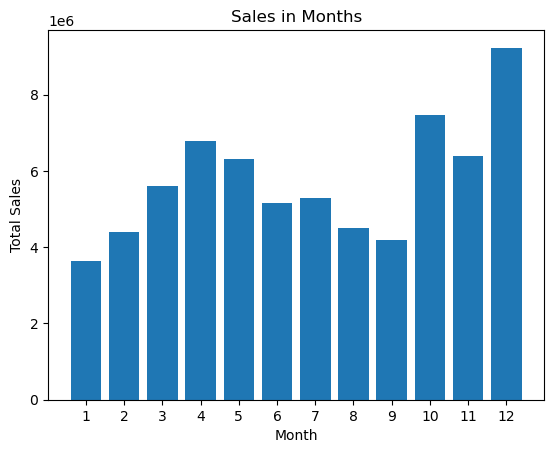

In [23]:
mois_noms = months=range(1,13)
plt.bar(months,all_data.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.title('Sales in Months')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

Dans quelle ville il a enregistré un maximum de commandes

In [25]:
#Mentre le nom de la ville
def city(x):
    return x.split(',')[1]

In [26]:
 all_data['City']=all_data['Purchase Address'].apply(city)
all_data

C:\Users\warda\AppData\Local\Temp\ipykernel_10192\3306910879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City']=all_data['Purchase Address'].apply(city)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [27]:
#regroupons les viles
City_order=all_data.groupby('City')['City'].count()
City_order

City
Atlanta          29762
Austin           19810
Boston           39868
Dallas           29640
Los Angeles      59210
New York City    49752
Portland         24930
San Francisco    89464
Seattle          29464
Name: City, dtype: int64

In [28]:
City_order.values

array([29762, 19810, 39868, 29640, 59210, 49752, 24930, 89464, 29464],
      dtype=int64)

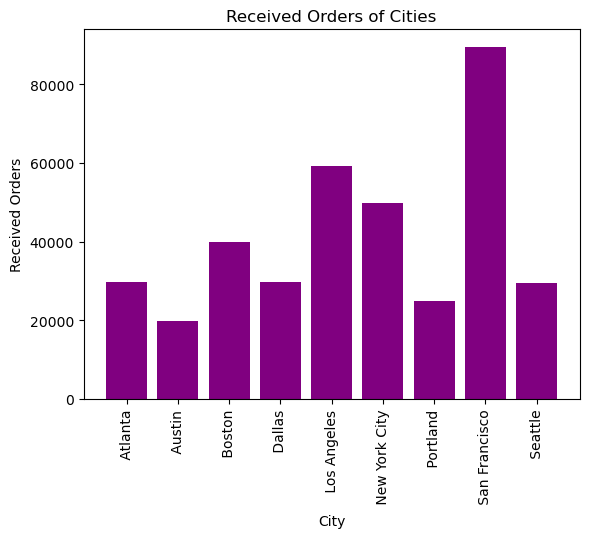

In [29]:
plt.bar(City_order.index, City_order.values,color='purple')
plt.xticks(rotation='vertical')
plt.title('Received Orders of Cities')
plt.ylabel('Received Orders')
plt.xlabel('City')
plt.show()

-	En quelle moment doit-il faire une campagne publicitaire pour avoir plus de ventes :

In [31]:
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour

all_data

C:\Users\warda\AppData\Local\Temp\ipykernel_10192\217604426.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour
C:\Users\warda\AppData\Local\Temp\ipykernel_10192\217604426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [32]:
# creer des variales
keys=[]
hours=[]
for key,hour in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))

Text(0.5, 1.0, 'Hours with max Received')

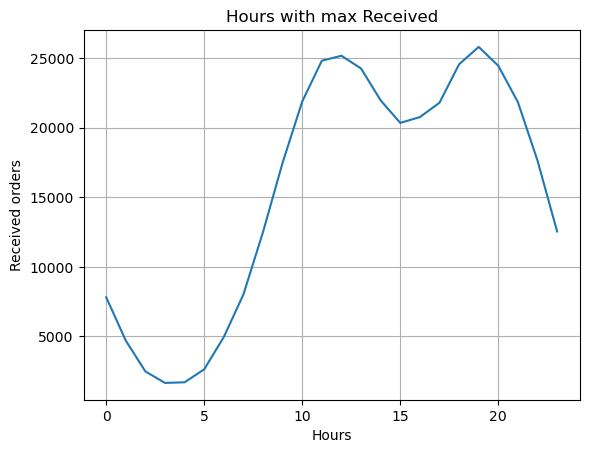

In [33]:
plt.grid()
plt.plot(keys,hours)
plt.ylabel('Received orders')
plt.xlabel('Hours')
plt.title( 'Hours with max Received')

#on peut voir que c'est entre 12h et 19h qu'on a plus de comamndes

Quels sont les produits qui se vendent le plus ?

<Axes: xlabel='Product'>

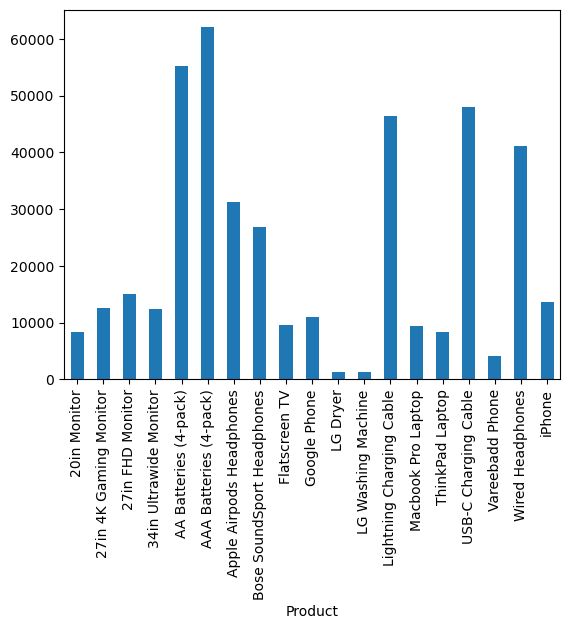

In [36]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

pourquoi elles se vendent le plus 

In [38]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [39]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

C:\Users\warda\AppData\Local\Temp\ipykernel_10192\2998676682.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products,rotation='vertical',size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

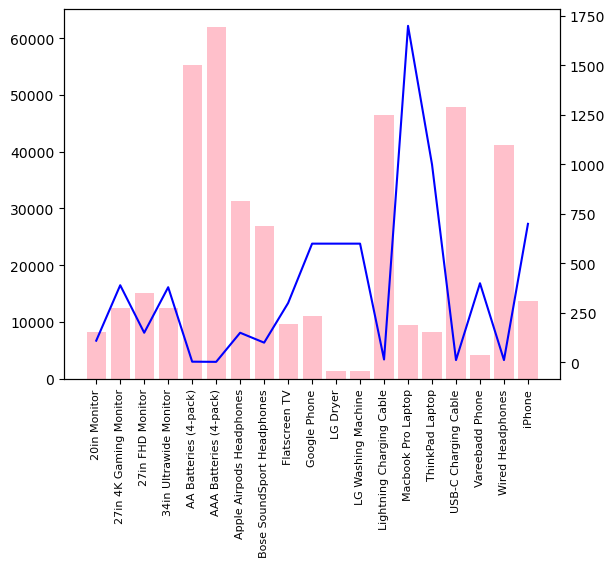

In [40]:
plt.figure(figsize=(40,24))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color ='pink')
ax2.plot(products,prices,'b-')
ax1.set_xticklabels(products,rotation='vertical',size=8)

Les combinaisons des produits qui se vendent le plus 

In [90]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [118]:
#regrouper les commandes avec le même ID 
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [122]:
df['Grouped']

0                USB-C Charging Cable,USB-C Charging Cable
2        Bose SoundSport Headphones,Bose SoundSport Hea...
3        Google Phone,Wired Headphones,Google Phone,Wir...
4        Google Phone,Wired Headphones,Google Phone,Wir...
5                        Wired Headphones,Wired Headphones
                               ...                        
11681        AAA Batteries (4-pack),AAA Batteries (4-pack)
11682                                        iPhone,iPhone
11683                                        iPhone,iPhone
11684        34in Ultrawide Monitor,34in Ultrawide Monitor
11685            USB-C Charging Cable,USB-C Charging Cable
Name: Grouped, Length: 371900, dtype: object

In [124]:
# supprimer les element supprimer 
df2=df.drop_duplicates(subset=['Order ID'])
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,"USB-C Charging Cable,USB-C Charging Cable"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,"Wired Headphones,Wired Headphones"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13,"USB-C Charging Cable,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,"AAA Batteries (4-pack),AAA Batteries (4-pack)"
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,"iPhone,iPhone"
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,"iPhone,iPhone"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,"34in Ultrawide Monitor,34in Ultrawide Monitor"


In [126]:
#conmpter les combinaisons les plus acheter
df2['Grouped'].value_counts()  #prendre les 5 premiers

Grouped
Lightning Charging Cable,Lightning Charging Cable                                                                        19831
AAA Batteries (4-pack),AAA Batteries (4-pack)                                                                            19826
AA Batteries (4-pack),AA Batteries (4-pack)                                                                              19809
USB-C Charging Cable,USB-C Charging Cable                                                                                19792
Wired Headphones,Wired Headphones                                                                                        17208
                                                                                                                         ...  
20in Monitor,34in Ultrawide Monitor,20in Monitor,34in Ultrawide Monitor                                                      1
LG Dryer,27in FHD Monitor,LG Dryer,27in FHD Monitor                                                    

Visualisation

<Axes: ylabel='count'>

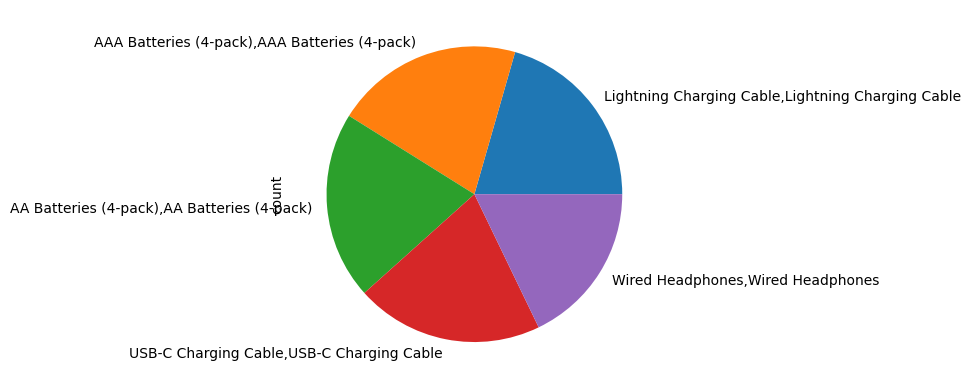

In [130]:
df2['Grouped'].value_counts() [0:5].plot.pie()